<a href="https://colab.research.google.com/github/ajinkyajumde/imdbdata/blob/main/Copy_of_M1W3_Guided_Project_EDA_on_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>




In [3]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


In [4]:
#mounting the drive for importing the csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
imdb_new=pd.read_csv('/content/drive/MyDrive/Almabetter projects/imdb data/imdb_data (1).csv')

In [6]:
imdb_new.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## **The above step gives us a brief idea about the data columns and the kind of data that we are dealing with**

In [7]:
imdb_new.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


## **The above step describes the given data set in terrm of number of values and the numeric data present in out dataset**

In [8]:
imdb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

## **The above step shows different columns along with the types of data contained in it. This will be helpful for us to wrangle the data and get the optimised dataaset for further analysis**

In [9]:
# Here we are changing the data in budget column as budget of a mivie cannot be below 1000, we are replacing it with the median value for the budget values greater then 1000.
imdb_new.loc[imdb_new['budget'] < 1000,'budget']=imdb_new.loc[imdb_new['budget'] >= 1000,'budget'].median()
imdb_new.loc[imdb_new['revenue'] < 1000,'revenue']=imdb_new.loc[imdb_new['revenue'] >= 1000,'revenue'].median()



In [10]:
imdb_new['profit']=imdb_new['revenue']-imdb_new['budget']

## **In the above step we have created a new column in the dataframe called profit by calculating it using Budget and Revenue**

In [11]:
maximum_profit=imdb_new['profit'].max()
maximum_profit

1316249360

## **The maximum Profit value is found by using the above step**

In [12]:
max_prof=imdb_new[imdb_new['profit']==maximum_profit]
max_prof


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,profit
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360,1316249360


## **Here we find out the details of all the column items for which the profit is maximum**

In [13]:
crew=eval(max_prof.loc[1761,'crew'])


##**As the data in some of the columns like crew,cast,etc. is in term of dictionaries but saved as a string, we use eval function in order to evaluate the data contained in the string**

##**Here we evaluate crew details for the movie with maximum profit**

In [14]:
dir=[]
prod=[]
for emp in crew:
  if emp['job']=='Director':
    dir_name=emp['name']
    dir.append(dir_name)
  if emp['job']=='Producer':
    prod_name=emp['name']
    prod.append(prod_name)
print(f' THE NAME OF THE DIRECTOR FOR THE MOVIE WITH MAXIMUM PROFIT IS {dir}')
print(f' THE NAMES OF THE PRODUCERS FOR THE MOVIE WITH MAXIMUM PROFIT IS {prod}')  


 THE NAME OF THE DIRECTOR FOR THE MOVIE WITH MAXIMUM PROFIT IS ['James Wan']
 THE NAMES OF THE PRODUCERS FOR THE MOVIE WITH MAXIMUM PROFIT IS ['Vin Diesel', 'Neal H. Moritz', 'Michael Fottrell', 'Brandon Birtell']


In [15]:
cast=eval(max_prof.loc[1761,'crew'])


In [16]:
act=[]

for emp in cast:
  
    act_name=emp['name']
    act.append(act_name)

print(f' THE NAME OF THE ACTORS FOR THE MOVIE WITH MAXIMUM PROFIT IS {act}')

 THE NAME OF THE ACTORS FOR THE MOVIE WITH MAXIMUM PROFIT IS ['Vin Diesel', 'Neal H. Moritz', 'Chris Morgan', 'Gary Scott Thompson', 'James Wan', 'Stephen F. Windon', 'Tony Mecca', 'Marc Spicer', 'Samantha Vincent', 'F. Valentino Morales', 'Michael Fottrell', 'Brandon Birtell', 'Leigh Folsom Boyd', 'Dylan Highsmith', 'Kirk M. Morri', 'Christian Wagner', 'Anne McCarthy', 'Kellie Roy', 'Jonathan Carlos', 'Alan Hook', 'Jay Pelissier', 'Kelly Richardson', 'Courtney Cocherell', 'Elena Albanese', 'Alex McCarroll', 'Bruce Di Valerio', 'Bill Brzeski', 'Danielle Berman', 'Sanja Milkovic Hays', 'Nava R. Sadan', 'Andrew Hunt', 'Jim Alan Cook', 'Shayne Allen Duhon', 'Empress Holley', 'Marina Marit', 'Les Morgan', 'Linda D. Flowers', "Yesim 'Shimmy' Osman", 'Jennifer Santiago', 'Rachel Solow', 'Roxane Griffin', 'James MacKinnon', 'Autumn Butler', "Roxy D'Alonzo", 'Hee Soo Kwon', 'Sarah Mays', 'Paul Pattison', 'Eleanor Sabaduquia', 'Guillaume DeLouche', 'Douglas T. Madison', 'Igor Meglic', 'Jacques 

In [17]:
top_movies=imdb_new.sort_values(by='profit',ascending=False).head(10)
lst=['original_title','budget','profit']
top_movies[lst]


,original_title,budget,profit
1761,Furious 7,190000000,1316249360
1126,The Avengers,220000000,1299557910
2770,Avengers: Age of Ultron,280000000,1125403694
684,Beauty and the Beast,160000000,1102886337
2322,Transformers: Dark of the Moon,195000000,928746996
734,Zootopia,150000000,873784195
1735,Jurassic Park,63000000,857100000
543,The Lord of the Rings: The Two Towers,79000000,847287400
906,The Dark Knight Rises,250000000,834939099
2562,Finding Dory,200000000,828570889


## **In the above step we have found out the top 10 movies in terms of profit earned**

In [18]:
top_movies

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,profit
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360,1316249360
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910,1299557910
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,...,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694,1125403694
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337,1102886337
2322,2323,"[{'id': 8650, 'name': 'Transformers Collection...",195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt1399103,en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,...,154.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The invasion we always feared. An enemy we nev...,Transformers: Dark of the Moon,"[{'id': 305, 'name': 'moon'}, {'id': 1612, 'na...","[{'cast_id': 3, 'character': 'Sam Witwicky', '...","[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",1123746996,928746996
734,735,NaN,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://movies.disney.com/zootopia,tt2948356,en,Zootopia,"Determined to prove herself, Officer Judy Hopp...",26.024868,...,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the urban jungle.,Zootopia,"[{'id': 2527, 'name': 'fox'}, {'id': 10360, 'n...","[{'cast_id': 23, 'character': 'Judy Hopps (voi...","[{'credit_id': '536e09650e0a2647cb00fe6b', 'de...",1023784195,873784195
1735,1736,"[{'id': 328, 'name': 'Jurassic Park Collection...",63000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.jurassicpark.com/,tt0107290,en,Jurassic Park,A wealthy entrepreneur secretly creates a them...,8.863776,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An adventure 65 million years in the making.,Jurassic Park,"[{'id': 911, 'name': 'exotic island'}, {'id': ...","[{'cast_id': 4, 'character': 'Dr. Alan Grant',...","[{'credit_id': '52fe4238c3a36847f800d291', 'de...",920100000,857100000
543,544,"[{'id': 119, 'name': 'The Lord of the Rings Co...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,tt01672

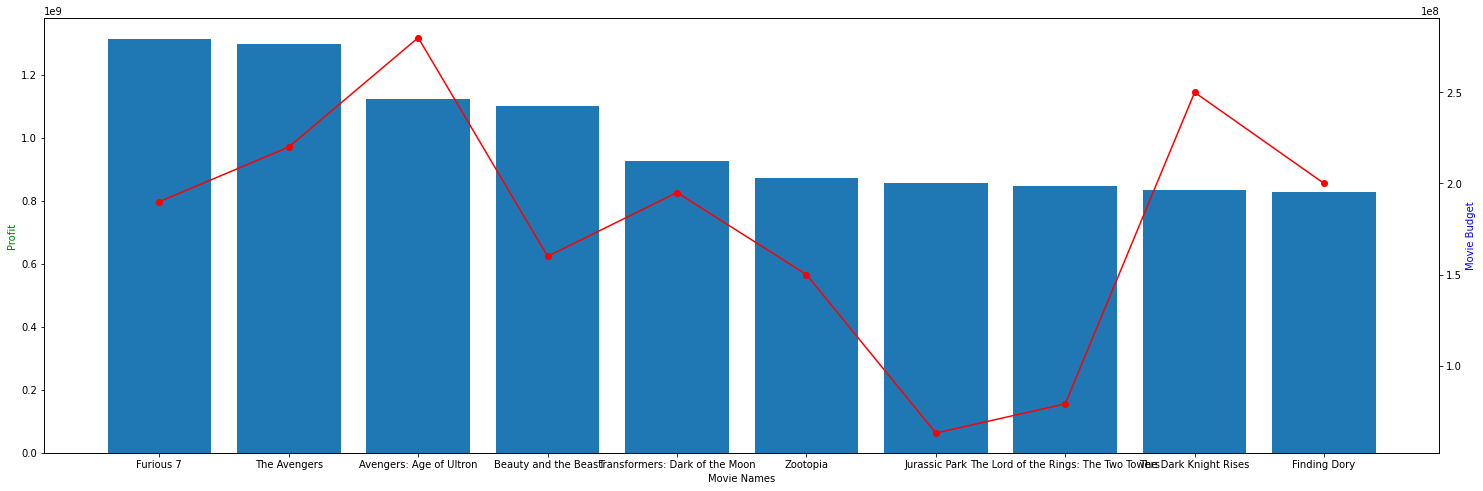

In [19]:
x=list(top_movies['original_title'])
y=list(top_movies['profit'])
y1=list(top_movies['budget'])

fig, ax1 = plt.subplots(figsize=(25, 8))

ax2 = ax1.twinx()
ax1.bar(x, y)
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Movie Names')
ax1.set_ylabel('Profit', color='g')
ax2.set_ylabel('Movie Budget', color='b')

plt.show()

## **Here we have demonstrated the budget and the profit earned by a movie. It is clear that the Furios 7 had maximum profit earned. Although the budget of Avengers : Age of Ultron was high, comparitively the profit was not upto the expectations. The same is the case for The Dark Knight Rises. Whreas for the Jurassic Park the case is reversed.**

In [20]:
#Converting the string itams in order to evaluate it
def conversion(str):
  return eval(str)
  

## **As the data in some of the columns like crew,cast,etc. is in term of dictionaries but saved as a string, we use eval function in order to evaluate the data contained in the string**

In [21]:
imdn=imdb_new.groupby(['original_language']).mean().reset_index()
columns=['original_language','budget','revenue','profit']
imdn=imdn[columns]
imdn.sort_values(by='profit',ascending=False).head(5)

,original_language,budget,revenue,profit
35,zh,2.373737e+07,7.221714e+07,4.847977e+07
7,en,2.947649e+07,7.495793e+07,4.548144e+07
32,tr,1.113333e+07,5.166341e+07,4.053008e+07
13,hi,8.674280e+06,2.659547e+07,1.792119e+07
28,sr,5.000000e+05,1.748753e+07,1.698753e+07


In [22]:
#Creating a list of all the genres contained in the dataset
lst=[]
for gen in imdb_new['genres']:
  try:

    gen=eval(gen)
    for i in gen:
    
      genre=i['name']
      lst.append(genre)
  
  except:
    pass
    

In [23]:
lst=set(lst)
lst

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

## **After iterating over all the columns, all the genres contained in the dataset were appended to the list. In order to remove duplicates, we converted the given list into a set so that the duplicates get removed.**

In [24]:
lst=list(lst)


In [25]:
from wordcloud import WordCloud

In [26]:
words = " ".join(str(each) for each in lst)

<Figure size 720x432 with 0 Axes>

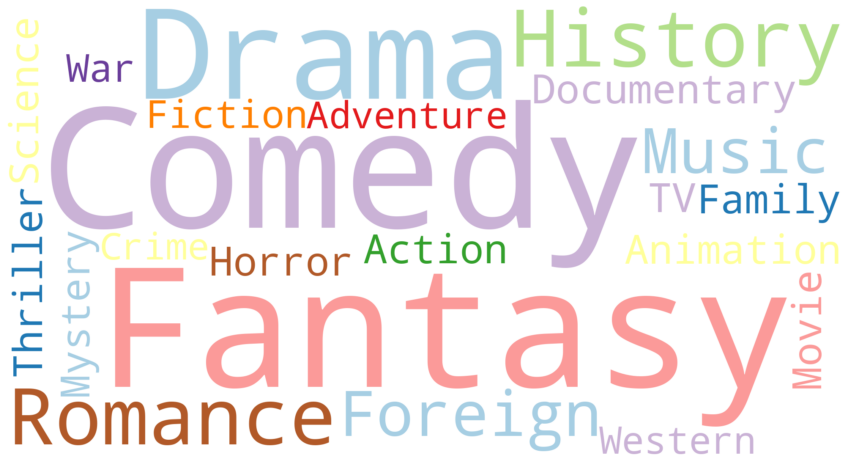

In [27]:
wordcloud = WordCloud(width=1980, height=1080, colormap="Paired_r",max_words=100, background_color="white").generate(words)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Instead of just creating a list of unique genres, we used wordcloud to display the genres in a fancy and catchya manner.**

In [28]:
imdb_new['roi']=imdb_new['profit']*100/imdb_new['budget']

In [29]:
k=imdb_new.groupby('original_language')['roi'].mean().reset_index()
j=k.sort_values(by='roi',ascending=False).head(5)

## **First we calculated the return on investment by using the above formula. Using following statements we created a pie chart to demonstrate mean ROI based on the original language of the movie.**

In [30]:
lab=list(j['original_language'])
x=list(j['roi'])


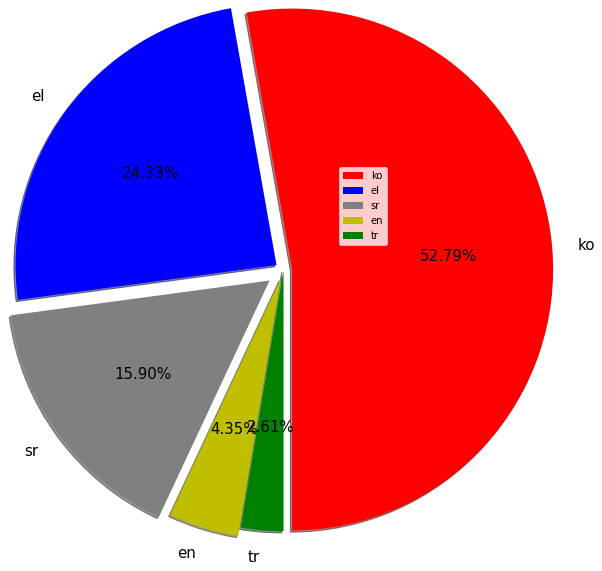

In [31]:
explode = [0.1,0.1,0.2,0.1,0] # To slice the perticuler section
colors = ["r", 'b','grey','y','g'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart
 
plt.pie(x, # Values
        labels = lab, # Labels for each sections
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 3, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 
plt.legend() # To show legend
plt.show() # To show pie chart only

In [32]:
#Applying conversion to all the columns with string data for evaluation where the value is not null
imdb_new.loc[~imdb_new['crew'].isna(),'crew']=imdb_new.loc[~imdb_new['crew'].isna(),'crew'].apply(conversion)

imdb_new.loc[~imdb_new['genres'].isna(),'genres']=imdb_new.loc[~imdb_new['genres'].isna(),'genres'].apply(conversion)

In [33]:
imdb_new.loc[~imdb_new['cast'].isna(),'cast']=imdb_new.loc[~imdb_new['cast'].isna(),'cast'].apply(conversion)

In [34]:
def getnames(crew_list):
  try:
    
    prod=[]
    dir=[]
    act=[]
    for emp in crew_list:
      if emp['job']=='Director':
        dir.append(emp['name'])
      if emp['job']=='Producer':

        prod.append(emp['name'])
    return prod,dir
  except:

    return [],[]

## **Here we have appended the producer and director name in the lists by iterating over the crew column.**

In [35]:
imdb_new[['producers','directors']]=imdb_new.apply(lambda row : getnames(row['crew']),axis=1,result_type='expand')

In [36]:
imdb_new.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,profit,roi,producers,directors
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349,-12.038207,[Andrew Panay],[Steve Pink]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435,137.873588,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall]
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000,296.727273,"[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle]
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000,1233.333333,[Sujoy Ghosh],[Sujoy Ghosh]
4,5,NaN,16450000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-12526030,-76.146079,[],[Jong-seok Yoon]


In [37]:
imdb_names=imdb_new[['original_title','producers','directors']]
imdb_names.head(5)

,original_title,producers,directors
0,Hot Tub Time Machine 2,[Andrew Panay],[Steve Pink]
1,The Princess Diaries 2: Royal Engagement,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall]
2,Whiplash,"[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle]
3,Kahaani,[Sujoy Ghosh],[Sujoy Ghosh]
4,마린보이,[],[Jong-seok Yoon]


In [38]:
producers=[]
for prod in imdb_names['producers']:
  for elem in prod:
    producers.append(elem)
prods=pd.DataFrame(producers,columns = ['producers'])
prods.head()

,producers
0,Andrew Panay
1,Whitney Houston
2,Mario Iscovich
3,Debra Martin Chase
4,David Lancaster


In [39]:
prods['ones']=1

In [40]:
p=prods.groupby('producers')['ones'].sum().reset_index(name='sum')
p.sort_values(by='sum',ascending=False).head(10)

,producers,sum
2468,Neal H. Moritz,26
1579,Joel Silver,21
436,Brian Grazer,20
3032,Scott Rudin,20
956,Eric Fellner,19
3297,Tim Bevan,19
259,Arnon Milchan,17
2891,Roger Birnbaum,16
1421,Jason Blum,15
2044,Luc Besson,13


## **In the above steps we tried to find out producers of each movie and then using count we found which producer has produced maximum films.**

In [41]:
directors=[]
for dir in imdb_names['directors']:
  for elem in dir:
    directors.append(elem)
dirs=pd.DataFrame(directors,columns = ['directors'])
dirs.head()

,directors
0,Steve Pink
1,Garry Marshall
2,Damien Chazelle
3,Sujoy Ghosh
4,Jong-seok Yoon


In [42]:
dirs['ones']=1

In [43]:
d=dirs.groupby('directors')['ones'].sum().reset_index(name='sum')
d.sort_values(by='sum',ascending=False).head(10)

,directors,sum
1657,Ron Howard,11
350,Clint Eastwood,11
1820,Steven Spielberg,10
210,Blake Edwards,9
2018,Woody Allen,9
1819,Steven Soderbergh,8
574,Francis Ford Coppola,8
1987,Wes Craven,8
237,Brian De Palma,8
1448,Paul W.S. Anderson,8


## **In the above steps we tried to find out directors of each movie and then using count we found which director has directed maximum films.**

In [44]:
def getnames1(cast_list):
  act=[]
  try:

    
    for emp in cast_list:

      act.append(emp['name'])

    return act
  except:
    return []

In [45]:
imdb_new['actors']=imdb_new.apply(lambda row : getnames1(row['cast']),axis=1)


In [46]:
actors=[]
for act in imdb_new['actors']:
  for elem in act:
    actors.append(elem)
acts=pd.DataFrame(directors,columns = ['actors'])
acts.head()

,actors
0,Steve Pink
1,Garry Marshall
2,Damien Chazelle
3,Sujoy Ghosh
4,Jong-seok Yoon


In [47]:
acts['ones']=1

In [48]:
a=acts.groupby('actors')['ones'].sum().reset_index(name='sum')
a.sort_values(by='sum',ascending=False).head(10)

,actors,sum
1657,Ron Howard,11
350,Clint Eastwood,11
1820,Steven Spielberg,10
210,Blake Edwards,9
2018,Woody Allen,9
1819,Steven Soderbergh,8
574,Francis Ford Coppola,8
1987,Wes Craven,8
237,Brian De Palma,8
1448,Paul W.S. Anderson,8


## **In the above steps we tried to find out actors in each movie and then using count we found which actor has starred in maximum films.**

In [49]:
top3=imdb_new.sort_values(by='roi',ascending=False).head(3)
top3

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,revenue,profit,roi,producers,directors,actors
1230,1231,"[{'id': 41437, 'name': 'Paranormal Activity Co...",15000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",http://www.paranormalactivity-movie.com/,tt1179904,en,Paranormal Activity,"After a young, middle class couple moves into ...",12.706424,...,Paranormal Activity,"[{'id': 10224, 'name': 'haunting'}, {'id': 147...","[{'cast_id': 3, 'character': 'Katie', 'credit_...","[{'credit_id': '52fe4477c3a368484e024b01', 'de...",193355800,193340800,1.288939e+06,"[Jason Blum, Oren Peli, Amir Zbeda]",[Oren Peli],"[Katie Featherston, Micah Sloat, Mark Fredrich..."
1679,1680,"[{'id': 64750, 'name': 'Blair Witch Collection...",60000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",http://www.blairwitch.com/,tt0185937,en,The Blair Witch Project,In October of 1994 three student filmmakers di...,14.838386,...,The Blair Witch Project,"[{'id': 616, 'name': 'witch'}, {'id': 3392, 'n...","[{'cast_id': 41, 'character': 'Mike', 'credit_...","[{'credit_id': '52fe4364c3a36847f8050c01', 'de...",248000000,247940000,4.132333e+05,"[Robin Cowie, Gregg Hale]","[Daniel Myrick, Eduardo S√°nchez]","[Michael C. Williams, Heather Donahue, Joshua ..."
2610,2611,NaN,5000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt5066556,ko,대호,While the Kingdom of Korea is under occupation...,3.447894,...,The Tiger: An Old Hunter's Tale,"[{'id': 414, 'name': 'hunter'}, {'id': 1262, '...","[{'cast_id': 0, 'character': 'Cheon Man-deok',...","[{'credit_id': '56657194c3a368510e001d58', 'de...",11083449,11078449,2.215690e+05,[],[Park Hoon-Jung],"[Choi Min-sik, Jeong Man-sik, Kim Sang-ho, Sun..."


In [51]:
name=[]
profit=[]
gen=[]
for index,row in imdb_new.iterrows():
  try:
  
    for emp in row['cast']:
      
      if emp['name']=='Clint Eastwood':
        name.append(row['original_title'])
        profit.append(row['profit'])
        gen.append(row['genres'])
      else:
        pass
  except:
    pass

      



<Figure size 720x432 with 0 Axes>

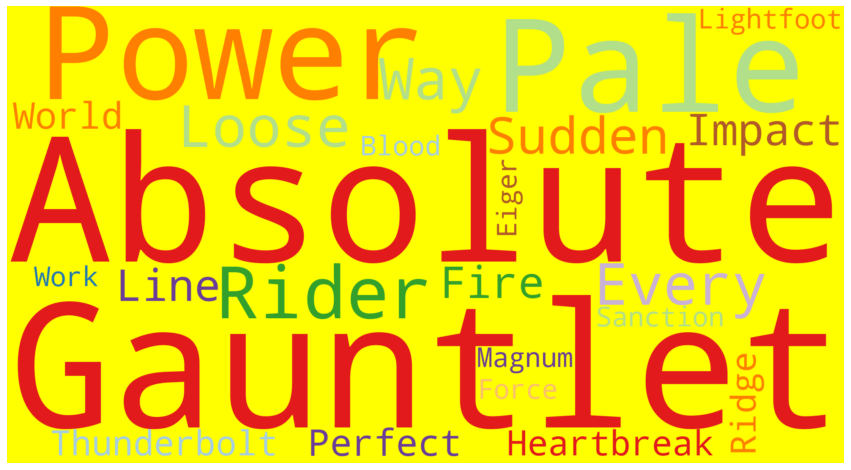

In [52]:
words = " ".join(str(each) for each in name)
wordcloud = WordCloud(width=1980, height=1080, colormap="Paired_r",max_words=100, background_color="yellow").generate(words)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

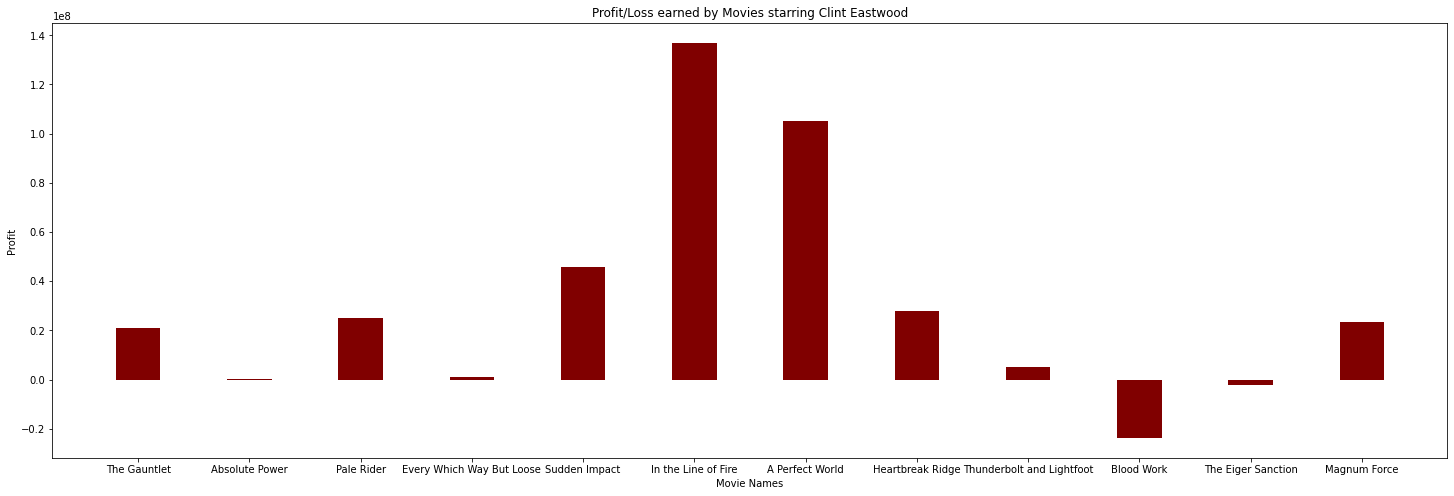

In [53]:
fig = plt.figure(figsize = (25, 8))
 
# creating the bar plot
plt.bar(name, profit, color ='maroon',
        width = 0.4)
 
plt.xlabel("Movie Names")
plt.ylabel("Profit")
plt.title("Profit/Loss earned by Movies starring Clint Eastwood")
plt.show()

## **We tried to deep dive into the profit earned in the movies starred by Mr Clint Eastwood who claims to be the topmost actor in terms of number of movies in the given database.**

In [54]:
producers=[]
for prod in top3['producers']:
  for elem in prod:
    producers.append(elem)
prods3=pd.DataFrame(producers,columns = ['producers'])


In [55]:
prods3

,producers
0,Jason Blum
1,Oren Peli
2,Amir Zbeda
3,Robin Cowie
4,Gregg Hale


## **Producers of the top 3 movies is demonstrated in the above dataframe**

# **Conclusion**
### **We tried to analyse the given dataset in terms of the given problem statement. The investors might go through the data insights and decide their upcoming movie accordingly based on the movie language,genres,and crew members.**